In [0]:
import numpy as np
import pandas as pd

In [5]:
#Load and see what the data looks like. Now we have 2 inputs which are the size and the nb_bedrooms. We are still trying to predict the house's price
data = pd.read_csv("data.csv")
print(data.head(5))

   size  nb_bedrooms   price
0  2104            3  399900
1  1600            3  329900
2  2400            3  369000
3  1416            2  232000
4  3000            4  539900


In [15]:
X = np.matrix([data['size'], data['nb_bedrooms']])
y = np.matrix(data['price'])
y = np.transpose(y)
print("Shape of X = {}".format(X.shape))
print("Shape of y = {}".format(y.shape))

Shape of X = (2, 47)
Shape of y = (47, 1)


In [18]:
theta = np.matrix([1.0, 2.0, 3.0])
theta = np.transpose(theta)
print(theta.shape)

(3, 1)


In [29]:
#Let's create a method that normalize all thoses inputs and returns T the normalized matrice's inputs. We also need the mean and the standard deviation to reverse the process
def featureScaleNormalize(X):
    mean = X.mean(1)
    stdev = X.std(1)
    T = (X - mean) / stdev
    return T, mean, stdev
T, mean, stdev = featureScaleNormalize(X)
T = np.transpose(T)
T.shape

(47, 2)

In [30]:
#Here is an important part. Since we have a matrice theta of shape 3,1 and a matrice T of shape 47,2
#We need to add a column of ones to the T matrice so we can do the matrice multiplication
tmp = np.matrix([1] * X.shape[1])
T = np.insert(T, 0, tmp, axis = 1)
print("Shape of T is {}".format(T.shape))
print("Shape of theta is {}".format(theta.shape))

Shape of T is (47, 3)
Shape of theta is (3, 1)


In [0]:
#Like week 1 we define the methods predict, cost and the fit_with_fost and visualize
def predict(X, theta):
    return X.dot(theta)
  
def cost(X, y, theta):
    predictions = predict(X, theta)
    cost = (1 / 2 * X.shape[0]) * np.sum(np.square(predictions - y))
    return cost
  
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = 1 / X.shape[0]
    J_history = []
    J_history.append(cost(X, y, theta))
    for i in range(num_iters):
        prediction = predict(X, theta)
        theta = theta - m * alpha * (X.T.dot((prediction - y)))
        J_history.append(cost(X, y, theta))
    
    return theta, J_history

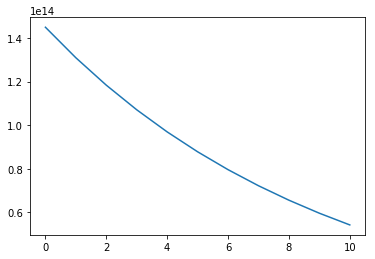

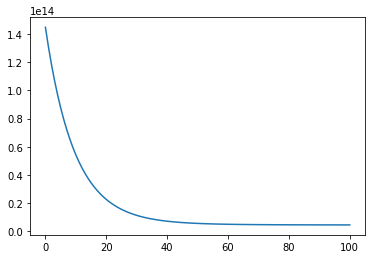

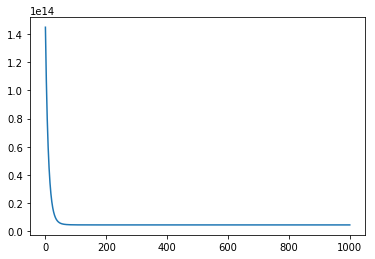

In [47]:
#Let's start the training and see what happens to the cost function over the iterations.
#Of course you can try to tune the alpha to find the better fit. Try with alpha=5 and see what happens
for nb in [10, 100, 1000]:
  theta = np.matrix([0.0, 0.0, 0.0])
  theta = np.transpose(theta)
  theta, J_history = fit_with_cost(T, y, theta, 0.05, nb)
  fit = plt.figure()
  ax = plt.axes()
  ax.plot(J_history)

In [48]:
#Let's try a new data we create and see what the prediction is
#Create the matrice with size = 1650 and nb_bedrooms = 3
test = np.matrix([1650, 3]).T
#DON'T forget to normalize since we trained on the normalized data
test = ((test - mean) / stdev).T
#create and add the column of ones with row = number of sample (here it's only 1 house we are trying to predict)
tmp = np.matrix([1])
test = np.insert(test, 0, tmp, axis = 1)
print(theta) #This is the theta (parameters) we updated and now they will help us predict the price of new houses passing it to the predict method
a = predict(test, theta)
print(a)

[[340412.65957447]
 [109447.796457  ]
 [ -6578.35484152]]
[[293081.46433768]]


In [0]:
def fit_with_regularization(X, y, theta, alpha, num_iters, lamb):
    m = 1 / X.shape[0]
    J_history = []
    J_history.append(cost(X, y, theta))
    for i in range(num_iters):
        reg = (lamb / X.shape[0]) * np.absolute(theta)
        reg[0] = 0
        prediction = predict(X, theta)
        theta = theta - m * alpha * (X.T.dot((prediction - y))) + reg
        J_history.append(cost(X, y, theta))
    
    return theta, J_history

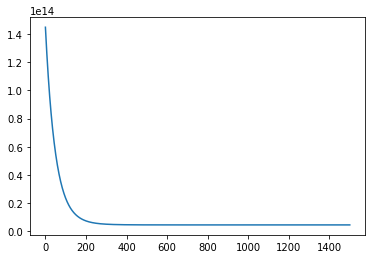

In [108]:
for nb in [1500]:
# ,1000]:
  theta = np.matrix([0.0, 0.0, 0.0])
  theta = np.transpose(theta)
  theta, J_history = fit_with_regularization(T, y, theta, 0.01, nb, lamb=0.01)
  fit = plt.figure()
  ax = plt.axes()
  ax.plot(J_history)

In [109]:
test = np.matrix([1650, 3]).T
test = ((test - mean) / stdev).T
tmp = np.matrix([1])
test = np.insert(test, 0, tmp, axis = 1)
print(theta)
a = predict(test, theta)
print(a)

[[340412.56301439]
 [112712.58085728]
 [ -8194.98790829]]
[[291990.64075476]]
